In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('2317.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,81/01/04,785000.0,47783000.0,62.0,62.0,60.0,61.0,0.0,237.0
1,81/01/06,570000.0,34496000.0,61.0,61.0,60.0,61.0,0.0,226.0
2,81/01/07,1484596.0,93646664.0,61.0,65.0,60.0,65.0,4.0,586.0
3,81/01/08,710798.0,45236173.0,65.0,65.0,62.5,64.5,-0.5,363.0
4,81/01/09,685948.0,43533224.0,63.0,64.0,62.5,64.0,-0.5,313.0


In [3]:
df = df[[0, 6]]
df.columns = ['date', 'close']
df.head()

,date,close
0,81/01/04,61.0
1,81/01/06,61.0
2,81/01/07,65.0
3,81/01/08,64.5
4,81/01/09,64.0


In [4]:
taiwan_date = df['date'].str.split('/', expand=True)

In [5]:
years = taiwan_date[0].astype(int) + 1911
years.head()

0    1992
1    1992
2    1992
3    1992
4    1992
Name: 0, dtype: int32

In [6]:
df['date'] = years.astype(str) + '/' + taiwan_date[1] + '/' + taiwan_date[2]
df.head()

,date,close
0,1992/01/04,61.0
1,1992/01/06,61.0
2,1992/01/07,65.0
3,1992/01/08,64.5
4,1992/01/09,64.0


In [9]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d %H:%M:%S')
type(df['date'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [13]:
df['close'] = df['close'].replace('--', 0).astype(float)
df['close'].head()

0    61.0
1    61.0
2    65.0
3    64.5
4    64.0
Name: close, dtype: float64

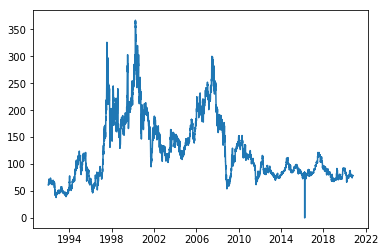

In [17]:
plt.plot(df['date'], df['close'])

In [19]:
df['return'] = df['close'].pct_change().fillna(0)
df.head()

,date,close,return
0,1992-01-04,61.0,0.000000
1,1992-01-06,61.0,0.000000
2,1992-01-07,65.0,0.065574
3,1992-01-08,64.5,-0.007692
4,1992-01-09,64.0,-0.007752
